# 6.2 순환 신경망 이해하기
여태까지 공부한 딥러닝 모델들은 feedforward network 형태를 띄고 있었다. 다시 말해 입력은 개별적으로 처리되었다. 예를 들어 뉴스기사의 토픽을 추출하는 모델이라고 생각한다면, 입력값으로 뉴스기사를 하나의 벡터형태로 변환하여 사용하였다.
이와 반대로 사람이 문장을 읽는 것처럼, 이전에 나온것을 기억하면서 단어별로 또는 한눈에 들어오는 만큼씩 처리할 수 있는 모델이 있는데, 이를 순환신경망(RNN- Recurrent Neural Network) 이라고 한다. 시퀀스를 순회하면서 지금까지 처리한 정보를 상태(State)에 저장하고, 이를 다음처리에 input으로 사용하는 형태이다. 또한 이 경우에는 *인풋의 개수와 아웃풋의 개수가 다를수도 있다.*

In [10]:
import numpy as np
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)


timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features, ))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    
    state_t = output_t

final_output_sequence = np.stack(successive_outputs, axis = 0)

In [3]:
from keras.layers import SimpleRNN

In [4]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [7]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32,return_sequences = True))
model.add(SimpleRNN(32,return_sequences = True))
model.add(SimpleRNN(32,return_sequences = True))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [11]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print("Data loading...")
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'Train Sequence')
print(len(input_test), 'Test Sequence')

print('Sequence Padding (Samples X time)')

input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_test, maxlen = maxlen)
print('Size of input_train : ', input_train.shape)
print('Size of input_test : ', input_test.shape)

Data loading...
25000 Train Sequence
25000 Test Sequence
Sequence Padding (Samples X time)
Size of input_train :  (25000, 500)
Size of input_test :  (25000, 500)


In [13]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 15s 728us/step - loss: 0.5688 - acc: 0.6969 - val_loss: 0.4115 - val_acc: 0.8300
Epoch 2/10
20000/20000 [==============================] - 14s 678us/step - loss: 0.3496 - acc: 0.8573 - val_loss: 0.3429 - val_acc: 0.8532
Epoch 3/10
20000/20000 [==============================] - 14s 722us/step - loss: 0.2723 - acc: 0.8927 - val_loss: 0.3838 - val_acc: 0.8262
Epoch 4/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.2143 - acc: 0.9193 - val_loss: 0.3099 - val_acc: 0.8738
Epoch 5/10
20000/20000 [==============================] - 19s 955us/step - loss: 0.1629 - acc: 0.9407 - val_loss: 0.4038 - val_acc: 0.8400
Epoch 6/10
20000/20000 [==============================] - 17s 852us/step - loss: 0.1207 - acc: 0.9585 - val_loss: 0.4448 - val_acc: 0.8424
Epoch 7/10
20000/20000 [==============================] - 16s 781us/ste

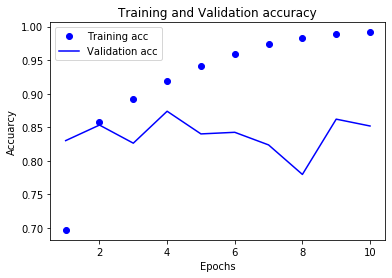

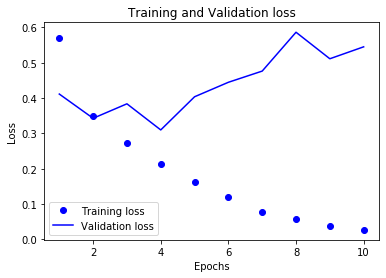

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label = "Training acc")
plt.plot(epochs, val_acc, 'b', label = "Validation acc")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuarcy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = "Training loss")
plt.plot(epochs, val_loss, 'b', label = "Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [16]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

history = model.fit(input_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 50s 2ms/step - loss: 0.5072 - acc: 0.7594 - val_loss: 0.3381 - val_acc: 0.8606
Epoch 2/10
20000/20000 [==============================] - 41s 2ms/step - loss: 0.2850 - acc: 0.8874 - val_loss: 0.7494 - val_acc: 0.7852
Epoch 3/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.2312 - acc: 0.9131 - val_loss: 0.2970 - val_acc: 0.8716
Epoch 4/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.1978 - acc: 0.9288 - val_loss: 0.3312 - val_acc: 0.8560
Epoch 5/10
20000/20000 [==============================] - 40s 2ms/step - loss: 0.1743 - acc: 0.9361 - val_loss: 0.3737 - val_acc: 0.8736
Epoch 6/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.1649 - acc: 0.9424 - val_loss: 0.3843 - val_acc: 0.8768
Epoch 7/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.1433 - acc: 0.9504 - val_loss: 0.3437 - val_acc:

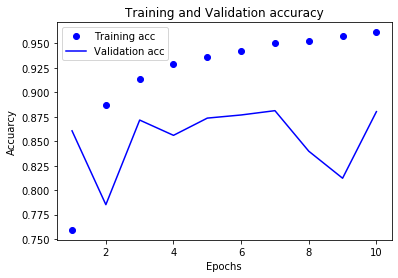

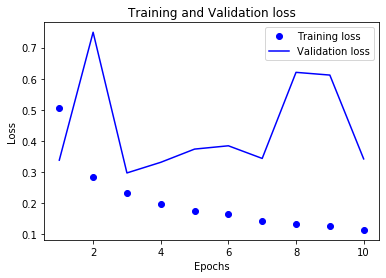

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label = "Training acc")
plt.plot(epochs, val_acc, 'b', label = "Validation acc")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuarcy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = "Training loss")
plt.plot(epochs, val_loss, 'b', label = "Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()